In [49]:
# sudo apt-get update
# sudo apt-get install graphviz graphviz-dev

! pip show pygraphviz

Name: pygraphviz
Version: 1.14
Summary: Python interface to Graphviz
Home-page: https://pygraphviz.github.io
Author: Manos Renieris
Author-email: Aric Hagberg <aric.hagberg@gmail.com>, Dan Schult <dschult@colgate.edu>
License: BSD-3-Clause
Location: /home/jain/anaconda3/envs/myenv/lib/python3.12/site-packages
Requires: 
Required-by: 


In [1]:
import json

In [2]:
with open("/home/jain/Desktop/ws/api_keys_in_laptop.json", "r") as f:
    api_keys = json.load(f)

In [4]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated, List
import operator
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage

In [5]:
class AgentState(TypedDict):
    query: str
    tavily_responses: List[str]
    referred_urls: List[str]
    initial_draft: str
    feedback: str
    final_draft: str

In [6]:
from tavily import TavilyClient
import os
tavily = TavilyClient(api_key=api_keys["tavily"])

In [9]:
def query_tavily(state):
    """Query Tavily for relevant articles."""
    response = tavily.search(
        query=state['query'], 
        include_answer="advanced",
        include_raw_content="text",
        max_results=10
    )
    content = []
    urls = []
    for r in response['results']:
        # print(r)
        if r['raw_content'] is not None:
            content.append(r['raw_content'])
            urls.append(r['url']
            )
    return {"query": state['query'], "tavily_responses": content, "referred_urls": urls}

In [ ]:
# # Test query_tavily()

# state = {"query": "latest updates on development going on Gurgaon/Gurugram Railway Station"}
# state = query_tavily(state)

In [14]:
# {'tavily_responses': ['Quantum Insider Intelligence\nAccelerate your quantum strategy\nGain a 360-degree view of the quantum landscape\u2028 to fuel your strategy\n\nTrusted by:\n\nQuantum Computing News\n\nXanadu Expands Partnership with ASTAR to Advance Photonic Quantum Computing\n\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\n\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\n\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\n\nNew Zealand Partners With Korea on Quantum Communication Projects\nFeatured Articles\n\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\n\nQuantum Computing Companies in 2025: Mapping the Global Quantum Landscape\n\nDeterministic Entanglement for Photonic Quantum Computing: Atom as Interface\n\nWQD 25: 12 Events For World Quantum Day 2025\n\nQuantum Source’s Scalable Photon-Atom Technology Enables Practical Quantum Computing\n\nKeep track of the Quantum Technology Market.\nIn one place.\nQuantum Business News\u200b\n\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\n\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\n\nXanadu Expands Partnership with ASTAR to Advance Photonic Quantum Computing\nAI Insider PRESS RELEASE — Xanadu Quantum Technologies Inc. (“Xanadu”), a leading photonic quantum computing company, today announced it has signed a Memorandum of Understanding (“MoU”) with the\n\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\n\nWhat Is The Price Of A Quantum Computer In 2025?\nQuantum Computing Exclusives\n\nQuantum World Tour: Brazil Demonstrates National Vision Fueling An Emerging Quantum Ecosystem\nInsider Brief: The Quantum World Tour, a global initiative launched by the International Telecommunication Union (ITU) in partnership with The Quantum Insider, will host its\nQuantum World Tour Saudi Arabia: Inside the Kingdom’s Quantum Expansion\nQuantum World Tour: Brazil Demonstrates National Vision Fueling An Emerging Quantum Ecosystem\nTelecom at the Edge of Scale: How Quantum Technologies Are Recasting the Network Economy\nDefence Panel Discusses How to Bring Quantum & AI to Bear in a Hostile World\nQuantum World Tour Heads to Australia, Showcasing Strategy, Science, and Emerging Industry Strengths\n\nQuantum World Tour Debuts in Malta, Europe’s Emerging Quantum Hub\n\nThe Quantum Economy Podcast: Audacity in EU Quantum with Théau Peronnin and Anders Indset\n\nQuantum Marketing Solutions\nDigital marketing campaigns for the world’s leading Quantum Technology companies.\n\nQuantum Industry Intelligence\nThe leading provider of information, data, and insights on Quantum Technologies.\nQuantum Interviews\n\nTQI Exclusive: Microsoft’s Krysta Svore Says Geometric Error-Correcting Codes Are a Step Toward Practical Applications\n\nWhat’s Quantum Biology? A Research Pioneer Shares His Vision for Quantum Technology’s Next Frontier\n\nStartup Fortaegis Says Its Hardware is Ready For Today’s Security Challenges – Perfectly Positioned For Tomorrow’s Quantum Era\n\nTQI Exclusive: Main Sequence’s Latest Thesis Guides Quantum Bets on the Edge of Commercial Use\n\nQuantum Source’s Scalable Photon-Atom Technology Enables Practical Quantum Computing\n\nSony Ventures Looks to Quantum and Renewable Energy for Scalable Deep Tech Investments\nCapital Markets News\n\nXanadu Expands Partnership with ASTAR to Advance Photonic Quantum Computing\n\nHorizon Quantum Secures $110 Million PIPE, With IonQ Among Lead Investors, to Support SPAC Merger\n\nSEALSQ Makes Strategic Investment in EeroQ\n\nParityQC Awarded Contract by DLR to Integrate Quantum Computing for Next-Generation Mobility Solutions\n\nNTT Focuses on Light For Cleaner, Scalable Path to Quantum Computing\n\nNiobium Raises $23M+ to Advance Next-Gen FHE Hardware\nQuantum National News\n\nNew Zealand Partners With Korea on Quantum Communication Projects\n\nUK And Germany Deepen Science And Tech Ties With £14 Million to Unlock Quantum’s Vast Potential\n\nChinese Research Team Launches Quantum Computing Platform Aimed at Speeding Scientific Work\n\nIndia’s Quantum Roadmap Targets 10 Globally Competitive Startups by 2035 in Bid to Become a Top-Three Power\n\nUK Backs First Mobile Quantum Brain Scanner to Study Blast Effects on Troops\n\nGuest Post: Forget the Qubits\nQuantum Research News\n\nNew Zealand Partners With Korea on Quantum Communication Projects\n\na16z Researcher Calls for Measured Quantum Security Shift, Not Panic\n\nFirst Successful Proof Of Quantum Teleportation Between Two Different Quantum Dots\n\nJapan Brings Ion-Trap Qubits Online Through The Cloud in a Step Toward Remote Quantum Computing\n\nWhen Will Quantum Technologies Become Part of Everyday Life?\n\nChinese Research Team Launches Quantum Computing Platform Aimed at Speeding Scientific Work\n\nMarketing\nWe create captivating digital marketing campaigns for the world’s leading Quantum Technology companies.\nTry our\nQuantum Market Intelligence Today\n\nStay Updated\nJoin Our Newsletter\nYou can unsubscribe anytime. For more details, review our Privacy Policy.\n\nFeatured News\nXanadu Expands Partnership with ASTAR to Advance Photonic Quantum Computing\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\nXanadu Expands Partnership with ASTAR to Advance Photonic Quantum Computing\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\nNavigate\nProjects\nContact Us\nLegal\nOne of our team will be in touch to learn more about your requirements, and provide pricing and access options.\nSubscribe to our industry leading leading newsletter for the latest in quantum news and insights.',
#   "Quantum Computers News\nTop Headlines\nLatest Headlines\nEarlier Headlines\nFriday, July 25, 2025\nThursday, July 24, 2025\nWednesday, July 2, 2025\nWednesday, June 25, 2025\nThursday, June 26, 2025\nMonday, June 30, 2025\nTuesday, June 10, 2025\nSaturday, June 14, 2025\nSunday, June 8, 2025\nThursday, May 29, 2025\nFriday, May 23, 2025\nFriday, May 9, 2025\nThursday, May 8, 2025\nTuesday, May 6, 2025\nMonday, May 5, 2025\nThursday, May 1, 2025\nWednesday, April 30, 2025\nFriday, April 25, 2025\nFriday, April 18, 2025\nThursday, April 17, 2025\nTuesday, April 15, 2025\nMonday, April 14, 2025\nThursday, April 10, 2025\nMonday, April 7, 2025\nWednesday, April 2, 2025\nThursday, March 27, 2025\nWednesday, March 26, 2025\nTuesday, March 25, 2025\nFriday, March 21, 2025\nWednesday, March 12, 2025\nTuesday, March 11, 2025\nWednesday, March 5, 2025\nTuesday, March 4, 2025\nThursday, February 27, 2025\nWednesday, February 26, 2025\nTuesday, February 25, 2025\nThursday, February 20, 2025\nWednesday, February 19, 2025\nFriday, February 14, 2025\nTuesday, February 11, 2025\nMonday, February 10, 2025\nFriday, February 7, 2025\nWednesday, February 5, 2025\nTuesday, February 4, 2025\nTuesday, January 28, 2025\nMonday, January 27, 2025\nFriday, January 24, 2025\nThursday, January 23, 2025\nTuesday, January 14, 2025\nThursday, January 9, 2025\nMonday, January 6, 2025\nFriday, December 20, 2024\nThursday, December 19, 2024\nWednesday, December 11, 2024\nTuesday, December 10, 2024\nWednesday, November 27, 2024\nThursday, November 21, 2024\nWednesday, November 13, 2024\nTuesday, November 12, 2024\nMonday, November 11, 2024\nTuesday, November 5, 2024\nThursday, October 31, 2024\nWednesday, October 30, 2024\nMonday, October 28, 2024\nThursday, October 24, 2024\nWednesday, October 23, 2024\nTuesday, October 22, 2024\nMonday, October 21, 2024\nThursday, October 17, 2024\nWednesday, October 16, 2024\nThursday, October 3, 2024\nWednesday, September 18, 2024\nMonday, September 16, 2024\nThursday, September 12, 2024\nWednesday, September 11, 2024\nFriday, August 30, 2024\nThursday, August 29, 2024\nFriday, August 23, 2024\nThursday, August 22, 2024\nTuesday, August 20, 2024\nBreaking\nTrending Topics\nStrange & Offbeat\nStay informed with ScienceDaily's free email newsletter, updated daily and weekly. Or view our many newsfeeds in your RSS reader:\nKeep up to date with the latest news from ScienceDaily via social networks:\nTell us what you think of ScienceDaily -- we welcome both positive and negative comments. Have any problems using the site? Questions?",
#   'quantum computing\n\nWhy One VC Thinks Quantum Is a Bigger Unlock Than AGI\n\nA Special Diamond Is the Key to a Fully Open Source Quantum Sensor\n\nHow Supercomputing Will Evolve, According to Jack Dongarra\n\nSee How Much Faster a Quantum Computer Will Crack Encryption\n\nA New Quantum Algorithm Speeds Up Solving a Huge Class of Problems\n\nQuantum Computing Is Dead. Long Live Quantum Computing!\n\nThe Quantum Apocalypse Is Coming. Be Very Afraid\n\nMicrosoft’s New Majorana 1 Processor Could Transform Quantum Computing\n\nThe Incredible Power of Quantum Memory\n\nCryptographers Are Discovering New Rules for Quantum Encryption\n\nNever-Repeating Patterns of Tiles Can Safeguard Quantum Information\n\nApple’s iMessage Is Getting Future-Resistant Encryption\n\nThe Holy Grail of Quantum Computing Is Finally Here. Or Is It?\n\nThis Laser Can Help Verify the Source of a Diamond\n\nThe Quest to Use Quantum Mechanics to Pull Energy Out of Nothing\n\nHow Quantum Physicists ‘Flipped Time’ (and Didn’t)\n\nUS Technological Dominance Is Not What It Used to Be\n\nThe WIRED Guide to Quantum Computing\n\nQuantum Startups’ Stock Market Dreams Are Decohering\n\nQuantum Computing Has a Noise Problem\n\nIs Moore’s Law Really Dead?\n\nThree-Way Entanglement Results Hint at Better Quantum Codes\n\nA New Attack Easily Knocked Out a Potential Encryption Algorithm\n\nQuantum Advantage Showdowns Have No Clear Winners\n\n© 2025 Condé Nast. All rights reserved. WIRED may earn a portion of sales from products that are purchased through our site as part of our Affiliate Partnerships with retailers. The material on this site may not be reproduced, distributed, transmitted, cached or otherwise used, except with the prior written permission of Condé Nast. Ad Choices\nSelect international site',
#   "Suggestions or feedback?\nMIT News | Massachusetts Institute of Technology - On Campus and Around the world\nBrowse By\nTopics\nDepartments\nCenters, Labs, & Programs\nSchools\nBreadcrumb\nTopic\nQuantum computing\nDownload RSS feed: News Articles / In the Media / Audio\n\nQuantum modeling for breakthroughs in materials science and sustainable energy\nQuantum chemist and School of Science Dean’s Postdoctoral Fellow Ernest Opoku is working on computational methods to study how electrons behave.\nNovember 19, 2025\nRead full story →\n\nFrom nanoscale to global scale: Advancing MIT’s special initiatives in manufacturing, health, and climate\nMIT.nano cleanroom complex named after Robert Noyce PhD ’53 at the 2025 Nano Summit.\nNovember 13, 2025\nRead full story →\n\nLeading quantum at an inflection point\nThe MIT Quantum Initiative is taking shape, leveraging quantum breakthroughs to drive the future of scientific and technological progress.\nNovember 10, 2025\nRead full story →\n\nStartup provides a nontechnical gateway to coding on quantum computers\nCo-founded by Kanav Setia and Jason Necaise ’20, qBraid lets users access the most popular quantum devices and software programs on an intuitive, cloud-based platform.\nNovember 4, 2025\nRead full story →\n\nSolar energy startup Active Surfaces wins inaugural PITCH.nano competition\nTwelve START.nano companies competed for the grand prize of nanoBucks to be used at MIT.nano’s facilities.\nOctober 20, 2025\nRead full story →\n\nWhy some quantum materials stall while others scale\nIn a new study, MIT researchers evaluated quantum materials’ potential for scalable commercial success — and identified promising candidates.\nOctober 15, 2025\nRead full story →\n\nLincoln Laboratory technologies win seven R&D 100 Awards for 2025\nInventions that protect US service members, advance computing, and enhance communications are recognized among the year's most significant new products.\nSeptember 9, 2025\nRead full story →\n\nTheory-guided strategy expands the scope of measurable quantum interactions\nAn oft-ignored effect can be used to probe an important property of semiconductors, a new study finds.\nJuly 24, 2025\nRead full story →\n\nProfessor Emeritus Daniel Kleppner, highly influential atomic physicist, dies at 92\nThe “godfather of Bose-Einstein condensation” and MIT faculty member for 37 years led research into atomic, molecular, and optical physics that led to GPS and quantum computing.\nJuly 15, 2025\nRead full story →\n\nThe high-tech wizardry of integrated photonics\nPhD candidate Sabrina Corsetti builds photonic devices that manipulate light to enable previously unimaginable applications, like pocket-sized 3D printers.\nJuly 2, 2025\nRead full story →\n\nNew 3D chips could make electronics faster and more energy-efficient\nThe low-cost, scalable technology can seamlessly integrate high-speed gallium nitride transistors onto a standard silicon chip.\nJune 18, 2025\nRead full story →\n\nClosing in on superconducting semiconductors\nPlasma Science and Fusion Center researchers created a superconducting circuit that could one day replace semiconductor components in quantum and high-performance computing systems.\nJune 17, 2025\nRead full story →\n\nMIT engineers advance toward a fault-tolerant quantum computer\nResearchers achieved a type of coupling between artificial atoms and photons that could enable readout and processing of quantum information in a few nanoseconds.\nApril 30, 2025\nRead full story →\n\nDevice enables direct communication among multiple quantum processors\nMIT researchers developed a photon-shuttling “interconnect” that can facilitate remote entanglement, a key step toward a practical quantum computer.\nMarch 21, 2025\nRead full story →\n\nResearchers establish new basis for quantum sensing and communication\nNew theoretical approach for generating quantum states could lead to improved accuracy and reliability of information and decision systems.\nMarch 13, 2025\nRead full story →\nPagination\nMore about MIT News at Massachusetts Institute of Technology\nThis website is managed by the MIT News Office, part of the Institute Office of Communications.\nNews by Schools/College:\nResources:\nTools:\nMassachusetts Institute of Technology\n77 Massachusetts Avenue, Cambridge, MA, USA",
#   'Bios\n\nPages\n\nContent\n\nNo matches\nWe couldn\'t find any matches for "".\nDouble check your spelling or try a different search term.\nStill can\'t find what you\'re looking for? Check out our featured articles.\nFeatured Articles\nDefining tokens\nWhen to flip the fee switch\nQuantum computing and blockchains: Matching urgency to actual threats\nTABLE OF CONTENTS\nTags\nTimelines to a cryptographically relevant quantum computer are frequently overstated — leading to calls for urgent, wholesale transitions to post-quantum cryptography.\nBut these calls often overlook the costs and risks of premature migration, and ignore the very different risk profiles of different cryptographic primitives:\nThese distinctions matter. Misconceptions distort cost-benefit analyses, causing teams to overlook more salient security risks — like bugs.\nThe real challenge in navigating a successful migration to post-quantum cryptography is matching urgency to actual threats. Below, I clarify common misconceptions about quantum threats to cryptography — covering encryption, signatures, and zero-knowledge proofs — with a special focus on their implications for blockchains.\nWhere are we on timing?\nA cryptographically relevant quantum computer (CRQC) in the 2020s is highly unlikely, despite high-profile claims otherwise.\nBy a “cryptographically relevant quantum computer” I mean a fault-tolerant, error-corrected quantum computer capable of running Shor’s algorithm at scales sufficient to attack elliptic curve cryptography or RSA within a reasonable timeframe (e.g., breaking secp256k1 or RSA-2048 with at most, say, one month of sustained computation).\nWe are nowhere near a cryptographically relevant quantum computer by any reasonable reading of public milestones and resource estimates. Companies sometimes claim a CRQC is likely before 2030 or well before 2035, but publicly known progress doesn’t support those claims.\nFor context, across all current architectures — trapped ions, superconducting qubits, and neutral atom systems — no quantum computing platform today comes close to the hundreds of thousands to millions of physical qubits (depending on error rates and error-correction schemes) required to run Shor’s algorithm on RSA-2048 or secp256k1.\nThe limiting factor is not just qubit count, but gate fidelities, qubit connectivity, and the sustained error-corrected circuit depth needed to run deep quantum algorithms. While some systems now exceed 1,000 physical qubits, raw qubit count alone is misleading: These systems lack the qubit connectivity and gate fidelities needed for cryptographically relevant computation.\nRecent systems approach the physical error rates where quantum error correction begins to work, but no one has demonstrated more than a handful of logical qubits with sustained error-corrected circuit depth… much less the thousands of high-fidelity, deep-circuit, fault-tolerant logical qubits actually required to run Shor’s algorithm. The gap between demonstrating that quantum error correction works in principle, and achieving the scale needed for cryptanalysis, remains vast.\nIn short: Until both qubit numbers and fidelities improve by several orders of magnitude, a cryptographically relevant quantum computer remains far beyond reach.\nIt’s easy to get confused by corporate press releases and media coverage, however. Some common misconceptions and sources of confusion here include:\nDemos claiming “quantum advantage”, which currently target contrived tasks. These tasks aren’t selected for their practical usefulness, but because they can run on existing hardware while appearing to exhibit large quantum speedups — a fact that is often obscured in announcements.\nCompanies claiming to have achieved many thousands of physical qubits. But this refers to quantum annealers, not the gate-model machines needed to run Shor’s algorithm to attack public-key cryptography.\nCompanies making liberal use of the term “logical qubit”. Physical qubits are noisy. Quantum algorithms need logical qubits, as mentioned above; Shor’s algorithm requires thousands of them. Using quantum error-correction, one can implement a logical qubit out of many physical qubits — typically hundreds to thousands depending on error rates. But some companies have stretched the term beyond recognition. For example, one recent announcement claimed to have achieved 48 logical qubits using a distance-2 code with only two physical qubits per logical qubit. This is absurd: distance-2 codes can only detect errors, not correct them. Real fault-tolerant logical qubits for cryptanalysis require hundreds to thousands of physical qubits each, not two.\nMore generally, many quantum computing roadmaps use the term “logical qubit” to refer to qubits that support only Clifford operations. These operations are efficiently classically simulable, and therefore insufficient to run Shor’s algorithm, which needs thousands of error-corrected T gates (or non-Clifford gates more generally).\nEven if one of those roadmaps aims for “thousands of logical qubits by year X”, that does not mean the company expects to run Shor’s algorithm to break classical cryptography by that same year X.\nThese practices have seriously distorted public perception of how close we are to a cryptographically relevant quantum computer, even among sophisticated observers.\nThat said, some experts are indeed excited by progress. Scott Aaronson for instance recently wrote that, given the “current staggering rate of hardware progress”,\nI now think it’s a live possibility that we’ll have a fault-tolerant quantum computer running Shor’s algorithm before the next U.S. presidential election.\nBut Aaronson later clarified that his statement does not mean a cryptographically relevant quantum computer: He’d count it as fulfilled even if a fully fault-tolerant run of Shor’s algorithm factored 15 = 3×5 — a calculation you could do faster with pencil and paper. The bar is still a tiny-scale execution of Shor’s algorithm, not a cryptographically relevant one, as previous factorings of 15 on quantum computers used simplified circuits rather than full, fault-tolerant Shor. And there’s a reason these experiments consistently target 15 as the number to factor: Arithmetic modulo 15 is computationally easy, whereas factoring even slightly larger numbers like 21 is far harder. Consequently, quantum experiments claiming to factor 21 typically rely on additional hints or shortcuts.\nSimply put, the expectation of a cryptographically relevant quantum computer capable of breaking RSA-2048 or secp256k1 in the next 5 years — which is what matters for practical cryptography — is unsupported by publicly known progress.\nEven 10 years remains ambitious. Given how far away we are from a cryptographically relevant quantum computer, excitement about progress is entirely compatible with a decade-plus timeline.\nWhat about the U.S. government’s targeting 2035 as a deadline for wholesale post-quantum (PQ) migration of government systems? I consider this a reasonable timeline for completing such a large-scale transition. However, it is not a forecast that a cryptographically relevant quantum computer will exist by then.\nWhere do HNDL attacks apply (and where not)?\nHarvest now, decrypt later (HNDL) attacks refer to adversaries storing encrypted traffic now, and then decrypting it later when a cryptographically relevant quantum computer exists. Nation-state level adversaries are surely already archiving encrypted communications at scale from the United States government, so they can decrypt these communications many years from now when a CRQC does exist.\nThat’s why encryption needs to transition today — at least for anyone with 10-50+ year confidentiality needs.\nBut digital signatures — which all blockchains rely on — are different from encryption: There’s no confidentiality to retroactively attack.\nIn other words, if a cryptographically relevant quantum computer arrives, signature forgery does become possible from that point forward, but past signatures weren’t “hiding” secrets the way that encrypted messages are. As long as you know the digital signature was generated before a CRQC arrived, it cannot be a forgery.\nThis makes the transition to post-quantum digital signatures less urgent than the post-quantum transition for encryption.\nMajor platforms are acting accordingly: Chrome and Cloudflare rolled out hybrid X25519+ML-KEM for web transport-layer security (TLS) encryption. [Throughout this post, I refer to encryption schemes for readability, though strictly speaking, secure communication protocols like TLS use key exchange or key encapsulation mechanisms rather than public-key encryption.]\n“Hybrid” here means using both a post-quantum-secure scheme (namely ML-KEM) and an existing scheme (X25519) on top of each other, to get the combined security guarantees of both. This way they can (hopefully) stymie HNDL attacks via ML-KEM, while maintaining classical security from X25519 in the event that ML-KEM turns out to be insecure even against today’s computers.\nApple’s iMessage also deployed such hybrid post-quantum encryption with its PQ3 protocol, as did Signal with its PQXDH and SPQR protocols.\nBy contrast, the rollout of post-quantum digital signatures to critical web infrastructure is being delayed until a cryptographically relevant quantum computer is actually imminent, because current post-quantum signature schemes introduce performance regressions (more on that later in this post).\nzkSNARKs — zero-knowledge Succinct Non-interactive ARguments of Knowledge, which are key to the long term scalability and privacy of blockchains — occupy a similar situation to signatures. This is because even for zkSNARKs that are not post-quantum-secure (they use elliptic curve cryptography, just like today’s non-post-quantum encryption and signature schemes), their zero-knowledge property is post-quantum secure.\nThe zero-knowledge property ensures that nothing about the secret witness is revealed in the proof — not even to a quantum adversary — so there is no confidential information to “harvest now” for later decryption.\nHence, zkSNARKs are not vulnerable to harvest now, decrypt later attacks. Just as a non-post-quantum signature generated today is secure, any zkSNARK proof that was generated before a cryptographically relevant quantum computer arrived is trustworthy (that is, the statement being proved is definitely true) — even if the zkSNARK uses elliptic curve cryptography. Only after a cryptographically relevant quantum computer arrives can attackers find convincing proofs of false statements.\nWhat this all means for blockchains\nMost blockchains are not exposed to HNDL attacks:\nMost non-privacy chains, like Bitcoin and Ethereum today, use non-post-quantum cryptography mainly for transaction authorization — that is, they use digital signatures, not encryption.\nAgain, those signatures are not an HNDL risk: “Harvest now, decrypt later” attacks apply to encrypted data. For example, Bitcoin’s blockchain is public; the quantum threat is signature forgery (deriving private keys to steal funds), not decrypting already-public transaction data. This eliminates the immediate cryptographic urgency from HNDL attacks.\nUnfortunately, even analyses from credible sources like the Federal Reserve incorrectly claim that Bitcoin is vulnerable to HNDL attacks, a mistake that exaggerates the urgency of transitioning to post-quantum cryptography.\nThat said, reduced urgency doesn’t mean that Bitcoin can wait: It faces different timeline pressures from the immense social coordination required to change the protocol. (More on Bitcoin’s unique challenges below.)\nThe exception as of today is privacy chains, many of which encrypt or otherwise hide recipients and amounts. That confidentiality can be harvested now and retroactively deanonymized once a quantum computer can break elliptic-curve cryptography.\nFor such privacy chains, the severity of attack varies by blockchain design. For example, with Monero’s curve-based ring signatures and key images (a per-output linkability tag used to stop double-spends), the public ledger alone would largely suffice for retroactively reconstructing the spend-graph. But in others the damage is more limited — see Zcash cryptographic engineer and researcher Sean Bowe’s discussion for details.\nIf it’s important to users that their transactions not be exposed by a cryptographically relevant quantum computer, then privacy chains should transition to post-quantum primitives (or hybrids) as soon as feasible. Or, they should adopt architectures that avoid placing decryptable secrets on-chain.\nBitcoin’s special headaches: governance + abandoned coins\nFor Bitcoin especially, two realities drive the urgency to begin switching to post-quantum digital signatures. Neither has anything to do with quantum technology.\nOne concern is governance speed: Bitcoin changes slowly. Any contentious issues could trigger a damaging hard fork if the community cannot agree on the appropriate solution.\nAnother concern is that Bitcoin’s switch to post-quantum signatures cannot be a passive migration: Owners must actively migrate their coins. This means abandoned, quantum-vulnerable coins cannot be protected. Some estimates place the amount of quantum-vulnerable and potentially abandoned BTC in the millions of coins, worth hundreds of billions of dollars at current prices (as of December 2025).\nHowever, the quantum threat to Bitcoin won’t be a sudden, overnight apocalypse… but more like a selective, progressive targeting process. Quantum computers won’t break all encryption simultaneously — Shor’s algorithm must target individual public keys one at a time. Early quantum attacks will be extremely expensive and slow. So once quantum computers are able to crack a single Bitcoin signing key, attackers will selectively prey on high-value wallets.\nMoreover, users who avoid address reuse and don’t use Taproot addresses — which expose public keys directly on-chain — are largely protected even without protocol changes: Their public keys remain hidden behind hash functions until their coins are spent. When they finally broadcast a spending transaction, the public key becomes visible and there’s a short real-time race, between the honest spender who needs to get their transaction confirmed, and any quantum-equipped attacker who wants to find the private key and spend the coins before the real owner’s transaction is final. So the truly vulnerable coins are those with public keys already exposed: early P2PK outputs, reused addresses, and Taproot holdings.\nFor vulnerable coins that have been abandoned, there is no easy solution. Some options include:\nThe second option creates serious legal and security problems. Using a quantum computer to take possession of coins without the private key — even with claimed, legitimate ownership or good intentions — could raise serious issues in many jurisdictions under theft and computer fraud laws.\nFurthermore, “abandoned” is itself a presumption based on inactivity. But no one actually knows whether these coins lack a living owner with access to the keys. Evidence that you once owned coins may not provide sufficient legal authority to break cryptographic protections to reclaim them. This legal ambiguity increases the likelihood that abandoned quantum-vulnerable coins fall into the hands of malicious actors willing to ignore legal constraints.\nA final issue specific to Bitcoin is its low transaction throughput. Even once migration plans are finalized, migrating all quantum-vulnerable funds to post-quantum-secure addresses would take months at Bitcoin’s current transaction rate.\nThese challenges make it critical for Bitcoin to begin planning its post-quantum transition now — not because a cryptographically relevant quantum computer is likely before 2030, but because the governance, coordination, and technical logistics of migrating billions of dollars worth of coins will take years to resolve.\nThe quantum threat to Bitcoin is real, but the timeline pressure comes from Bitcoin’s own constraints, not from imminent quantum computers. Other blockchains face their own challenges with quantum-vulnerable funds, but Bitcoin is uniquely exposed: Its earliest transactions used pay-to-public-key (P2PK) outputs that place public keys directly on-chain, leaving an especially significant fraction of BTC vulnerable to cryptographically relevant quantum computers. This technical difference — combined with Bitcoin’s age, value concentration, low throughput, and governance rigidity — makes the problem especially severe.\nNote that the vulnerabilities I describe above apply to the cryptographic security of Bitcoin’s digital signatures — but not to the economic security of the Bitcoin blockchain. This economic security derives from the proof-of-work (PoW) consensus mechanism, which is not as vulnerable to attacks from quantum computers for three reasons:\nThe costs and risks of post-quantum signatures\nTo see why blockchains shouldn’t rush post-quantum signature deployment, we need to understand both the performance costs and our still-evolving confidence in post-quantum security.\nMost post-quantum cryptography is based on one of five approaches:\nWhy are there five different approaches? The security of any post-quantum cryptographic primitive rests on the assumption that quantum computers cannot efficiently solve a specific mathematical problem. The more “structured” that problem is, the more efficient the cryptographic protocols we can build from it.\nBut this cuts both ways: Additional structure also creates more surface area for attack algorithms to exploit. This creates a fundamental tension — stronger assumptions enable better performance, but at the cost of potential security vulnerabilities (that is, increased likelihood that the assumptions turn out to be wrong).\nGenerally speaking, hash-based approaches are the most conservative security-wise, since we have the most confidence that quantum computers cannot efficiently attack these protocols. But they are also the least performant. For example, hash-based signatures standardized by NIST have size 7-8 kilobytes even at its smallest parameter settings. For comparison, today’s elliptic-curve-based digital signatures are only 64 bytes. This is roughly a 100x difference in size.\nLattice schemes are a major focus for deployment today. The only encryption scheme, and two of the three signature algorithms already selected by NIST for standardization, are based on lattices. One lattice scheme (ML-DSA, formerly Dilithium) produces signatures ranging from 2.4 KB (at the 128-bit security level) to 4.6 KB (at the 256-bit security level) — making them roughly 40-70x bigger than today’s elliptic curve-based ones. The other lattice scheme, Falcon, has somewhat smaller signatures (666 bytes for Falcon-512 and 1.3 KB for Falcon-1024) but comes with complex floating-point arithmetic that NIST itself flags as a special implementation challenge. One of the creators of Falcon, Thomas Pornin, called it “by far the most complicated cryptographic algorithm I have ever implemented.”\nImplementation security is also much more challenging with lattice-based than elliptic-curve-based signature schemes: ML-DSA has many more sensitive intermediate values and nontrivial rejection-sampling logic that needs side-channel and fault protection. Falcon adds constant-time floating-point concerns; several side-channel attacks on Falcon implementations have in fact recovered secret keys.\nThese issues pose immediate risks, unlike the much more distant threat of cryptographically relevant quantum computers.\nThere’s good reason to be cautious when deploying more performant approaches to post-quantum cryptography. Historically, leading candidates like Rainbow (an MQ-based signature scheme) and SIKE/SIDH (an isogeny-based encryption scheme) were broken classically, that is, broken using today’s computers, not quantum ones.\nThis happened well into NIST’s standardization process. That’s healthy science doing its job, but it illustrates that premature standardization and deployment can backfire.\nAs mentioned earlier, internet infrastructure is taking a deliberate approach to signature migration. This is especially notable given how long cryptographic transitions for the internet actually take once begun. The move away from MD5 and SHA-1 hash functions — technically deprecated by web-governing bodies years ago — took many more years to actually implement across infrastructure, and is still ongoing in some contexts. This happened despite those schemes being completely broken, not just being potentially vulnerable to future technology.\nChallenges unique to blockchain vs. internet infrastructure\nFortunately, blockchains that are actively maintained by communities of open source developers — like Ethereum or Solana — can upgrade more quickly than traditional web infrastructure. On the other hand, traditional web infrastructure benefits from frequent key rotation, which means its attack surface moves faster than early quantum machines could target — a luxury blockchains don’t have, since coins and their associated keys can sit exposed indefinitely.\nBut on balance, blockchains should still follow the web’s deliberate approach to signature migration. Neither setting is exposed to HNDL attacks for signatures, and the costs and risks of prematurely migrating to immature post-quantum schemes remain significant regardless of how long keys persist.\nThere are also challenges specific to blockchains that make premature migration especially risky and complex: For example, blockchains have unique requirements for signature schemes, particularly the ability to quickly aggregate many signatures. Today, BLS signatures are commonly used because they enable very fast aggregation, but they are not post-quantum secure. Researchers are exploring SNARK-based aggregation of post-quantum signatures. This work is promising, but still early.\nFor SNARKs specifically, the community currently focuses on hash-based constructions as the leading post-quantum option. But a major shift is coming: I am confident that in the coming months and years, lattice-based options will emerge as attractive alternatives. These alternatives will have better performance in various respects than hash-based SNARKs, such as substantially shorter proofs — analogous to how lattice-based signatures are shorter than hash-based ones.\nThe bigger problem right now: Implementation security\nFor years to come, implementation vulnerabilities will be a far bigger security risk than a cryptographically relevant quantum computer. For SNARKs, the primary concern is bugs.\nBugs are already a challenge for digital signature and encryption schemes, and SNARKs are vastly more complicated. Indeed, a digital signature scheme can be viewed as a very simple kind of zkSNARK, for the statement “I know the private key corresponding to my public key, and I authorized this message.”\nFor post-quantum signatures, the immediate risks also include implementation attacks such as side-channel and fault-injection attacks. These kinds of attacks are well-documented and can extract secret keys from deployed systems. They pose far more pressing threats than do distant quantum computers.\nThe community will be working for years to identify and fix bugs in SNARKs, and to harden post-quantum signature implementations against side-channel and fault-injection attacks. Since the dust has yet to settle around post-quantum SNARKs and signature aggregation schemes, blockchains that transition prematurely risk locking themselves into suboptimal schemes. They could need to migrate again when better options emerge, or when implementation vulnerabilities are discovered.\nWhat should we do? 7 recommendations\nGiven the realities I outline above, I’ll conclude with recommendations for various stakeholders — from builders to policymakers. The overarching principle: Take the quantum threat seriously, but do not act under the presumption that a cryptographically relevant quantum computer will arrive before 2030. This presumption is not justified by current progress. Nonetheless, there are still things we can and should do now:\n#1 We should deploy hybrid encryption immediately.\nOr at least, wherever long-term confidentiality matters and costs are tolerable.\nMany browsers, CDNs, and messaging apps (like iMessage and Signal) already have deployed hybrid approaches. The hybrid approach — post-quantum + classical — protects against HNDL attacks while hedging against potential weaknesses in post-quantum schemes.\n#2 Use hash-based signatures immediately when their large size is tolerable.\nSoftware/ firmware updates — and other such low-frequency, size-insensitive contexts — should adopt hybrid hash-based signatures now. (Hybrid to hedge against implementation bugs in the new schemes, not because hash-based security assumptions are in doubt.)\nThis is conservative and gives society a clear “lifeboat” in the unlikely event that a cryptographically relevant quantum computer appears unexpectedly soon. Without post-quantum-signed software updates already in place, we’d face a bootstrapping problem after a CRQC emerges: We wouldn’t be able to securely distribute the post-quantum cryptography fixes we’d need to withstand it.\n#3 Blockchains don’t need to rush post-quantum signatures — but should start planning now.\nBlockchain developers should follow the web PKI community’s lead in taking a deliberate approach to post-quantum signature deployment. This allows post-quantum signature schemes to continue maturing in both performance and our understanding of their security. This approach also allows developers time to re-architect systems to handle larger signatures and develop better aggregation techniques.\nFor Bitcoin and other L1s: The community needs to define migration paths and policies on abandoned quantum-vulnerable funds. Passive migration is impossible, so planning is critical. And since Bitcoin faces special challenges that are mostly non-technical — slow governance, and a large number of high-value potentially abandoned quantum-vulnerable addresses — it’s especially important that the Bitcoin community begin that planning now.\nMeanwhile, we need to allow research on post-quantum SNARKs and aggregatable signatures to mature (likely another couple of years). Again, migrating prematurely risks locking into suboptimal schemes or needing a second migration to address implementation bugs.\nA note on Ethereum’s account models: Ethereum supports two account types with different implications for post-quantum migration — externally owned accounts (EOAs), the traditional account type controlled by secp256k1 private keys; and smart contract wallets with programmable authorization logic.\nIn a non-emergency scenario where Ethereum adds post-quantum signature support, upgradeable smart contract wallets could switch to post-quantum verification via a contract upgrade — while EOAs would likely need their funds moved to new post-quantum-secure addresses (though Ethereum may well provide dedicated migration mechanisms for EOAs as well). In a quantum emergency, Ethereum researchers have proposed a hard-fork plan to freeze vulnerable accounts and let users recover funds by proving knowledge of their seed phrase using post-quantum-secure SNARKs. This recovery mechanism would apply to both EOAs and any smart contract wallets that hadn’t already been upgraded.\nThe practical implication for users: Well-audited, upgradeable, smart contract wallets may provide a marginally smoother migration path — but the difference is modest and comes with tradeoffs around trust in wallet providers and upgrade governance. What matters more than account type is that the Ethereum community continues its work on post-quantum primitives and emergency-response plans.\nA broader design lesson for builders: Many blockchains today tightly couple account identity to specific cryptographic primitives — Bitcoin and Ethereum to ECDSA signatures over secp256k1, others to EdDSA. The challenge of post-quantum migration highlights the value of decoupling account identity from any particular signature scheme. Ethereum’s move toward smart accounts and similar account-abstraction efforts on other chains reflect this trend: letting accounts upgrade their authentication logic without abandoning their on-chain history and state. This decoupling won’t make post-quantum migration trivial, but it does provide substantially more flexibility than hard-wiring accounts to a single signature scheme. (This also enables unrelated features like sponsored transactions, social recovery, and multisigs).\n#4 For privacy chains, which encrypt or hide transaction details, prioritize a transition sooner if performance is tolerable.\nUser confidentiality on these chains is currently exposed to HNDL attacks, though severity varies amongst designs. Chains where the public ledger alone enables full retroactive deanonymization face the most urgent risk.\nConsider hybrid (post-quantum + classical) schemes to protect against ostensibly post-quantum schemes turning out to be even classically insecure, or implement architectural changes that avoid placing decryptable secrets on-chain.\n#5 Prioritize implementation security — not quantum threat mitigation — in the near term.\nEspecially for complex cryptographic primitives like SNARKs and post-quantum signatures, bugs and implementation attacks (side-channel attacks, fault injection) will be far bigger security risks than cryptographically relevant quantum computers for years to come.\nInvest in auditing, fuzzing, formal verification, and defense in depth/layered security approaches right now — don’t let quantum worries overshadow the far more pressing threat of bugs!\n#6 Fund quantum computing development.\nA big national security implication of all of the above is that we need to sustain funding and talent development for quantum computing.\nA major adversary achieving cryptographically relevant quantum computing capabilities before the U.S. does would pose severe national security risks to us and others around the world.\n#7 Maintain perspective on quantum computing announcements.\nThere will be many milestones in the years to come as quantum hardware matures. Paradoxically, the very frequency of these announcements is itself evidence of how far we remain from a cryptographically relevant quantum computer: Each milestone represents one of many bridges we must cross before reaching that point, and each will generate its own wave of headlines and excitement.\nTreat press releases as progress reports to critically assess, not prompts for abrupt action.\n\nOf course, there can be surprising developments or innovations that accelerate projected timelines, just as there can be severe scaling bottlenecks that lengthen them.\nI won’t argue that a cryptographically relevant quantum computer in five years is literally impossible, only highly unlikely. The recommendations above are robust to that uncertainty, and following them avoids the more immediate, more probable risks: implementation bugs, rushed deployments, and the ordinary ways cryptographic transitions go wrong.\nJustin Thaler is Research Partner at a16z and an Associate Professor in the Department of Computer Science at Georgetown University. His research interests include verifiable computing, complexity theory, and algorithms for massive data sets.\n—\nThe views expressed here are those of the individual AH Capital Management, L.L.C. (“a16z”) personnel quoted and are not the views of a16z or its affiliates. Certain information contained in here has been obtained from third-party sources, including from portfolio companies of funds managed by a16z. While taken from sources believed to be reliable, a16z has not independently verified such information and makes no representations about the current or enduring accuracy of the information or its appropriateness for a given situation. In addition, this content may include third-party advertisements; a16z has not reviewed such advertisements and does not endorse any advertising content contained therein.\nThe views expressed here are those of the individual AH Capital Management, L.L.C. (“a16z”) personnel quoted and are not the views of a16z or its affiliates. Certain information contained in here has been obtained from third-party sources, including from portfolio companies of funds managed by a16z. While taken from sources believed to be reliable, a16z has not independently verified such information and makes no representations about the current or enduring accuracy of the information or its appropriateness for a given situation. In addition, this content may include third-party advertisements; a16z has not reviewed such advertisements and does not endorse any advertising content contained therein.\nYou should consult your own advisers as to those matters. References to any securities or digital assets are for illustrative purposes only, and do not constitute an investment recommendation or offer to provide investment advisory services. Furthermore, this content is not directed at nor intended for use by any investors or prospective investors, and may not under any circumstances be relied upon when making a decision to invest in any fund managed by a16z. (An offering to invest in an a16z fund will be made only by the private placement memorandum, subscription agreement, and other relevant documentation of any such fund and should be read in their entirety.) Any investments or portfolio companies mentioned, referred to, or described are not representative of all investments in vehicles managed by a16z, and there can be no assurance that the investments will be profitable or that other investments made in the future will have similar characteristics or results. A list of investments made by funds managed by Andreessen Horowitz (excluding investments for which the issuer has not provided permission for a16z to disclose publicly as well as unannounced investments in publicly traded digital assets) is available at \nThe content speaks only as of the date indicated. Any projections, estimates, forecasts, targets, prospects, and/or opinions expressed in these materials are subject to change without notice and may differ or be contrary to opinions expressed by others. Please see  for additional important information.'],
#  'referred_urls': ['https://thequantuminsider.com/',
#   'https://www.sciencedaily.com/news/computers_math/quantum_computers/',
#   'https://www.wired.com/tag/quantum-computing/',
#   'https://news.mit.edu/topic/quantum-computing',
#   'https://a16zcrypto.com/posts/article/quantum-computing-misconceptions-realities-blockchains-planning-migrations/']}

In [21]:
from langchain_openai import ChatOpenAI
llm_gpt_5_mini = ChatOpenAI(model="gpt-5-mini")

def write_initial_draft(state):
    prompt = f"""Based on these articles (presented to you as a List[str]), write an initial draft of the research report with a suitable title based on the user query.
User Query: {state['query']}
List of articles: {state['tavily_responses']} 

The tone for the draft should be conversational as you explain the findings from input articles in layman terms.
Target audience for this draft is: novice students (high school and undergrad)
The draft should be about 800-1000 words (excluding HTML tags).

Strictly Follow Below Rules:  
- Do not miss out any detail/fact/figure from the articles passed to you for reference.
- Don't return any additional opening or closing commentary of yours (only return the title and article draft)
- Think step by step while generating the draft to deliver your finest work. Don't rush.
- **Generate the report in HTML format**
"""

    response = llm_gpt_5_mini.invoke(prompt)
    return {"query": state['query'], "tavily_responses": state['tavily_responses'], "initial_draft": response.content}

In [24]:
# # Testing write_initial_draft()

# # state = {'query': "latest updates on quantum computing", 'tavily_responses': ["News on quantum computing\nQuantum computer\nA quantum computer is a device for computation that makes direct use of quantum mechanical phenomena, such as superposition and entanglement, to perform operations on data. The basic principle behind quantum computation is that quantum properties can be used to represent data and perform operations on these data.\nAlthough quantum computing is still in its infancy, experiments have been carried out in which quantum computational operations were executed on a very small number of qubits (quantum binary digits). Both practical and theoretical research continues with interest, and many national government and military funding agencies support quantum computing research to develop quantum computers for both civilian and national security purposes, such as cryptanalysis.\nIf large-scale quantum computers can be built, they will be able to solve certain problems much faster than any of our current classical computers (for example Shor's algorithm). Quantum computers are different from other computers such as DNA computers and traditional computers based on transistors. Some computing architectures such as optical computers may use classical superposition of electromagnetic waves. Without some specifically quantum mechanical resources such as entanglement, it is conjectured that an exponential advantage over classical computers is not possible.\nThis text uses material from Wikipedia,\nlicensed under CC BY-SA\n\nTerahertz device sets performance record and opens new quantum horizons\n\nScientists advance quantum signaling with twisted light technology\n\nSynchrotron radiation sources: Toolboxes for quantum technologies\n\nCan quantum computers help researchers learn about the inside of a neutron star?\n\nCorral technique measures fragile quantum states in magnet-superconductor hybrids from afar\n\nShop-bought cable helps power two quantum networks\n\nSymmetry simplifies quantum noise analysis, paving way for better error correction\n\nBright squeezed vacuum reveals hidden quantum effects in strong-field physics\n\nEfficient quantum process tomography for enabling scalable optical quantum computing\n\nControlling triple quantum dots in a zinc oxide semiconductor\nAbout\nPhys.org™ is a leading web-based science, research and technology news service which covers a full range of topics.\nPhys.org is a part of Science X network.\nWith a global reach of over 10 million monthly readers and featuring dedicated websites for science (Phys.org),\ntechnology (Tech Xplore) and medical research (Medical Xpress),\nthe Science X network is one of the largest online communities for science-minded people.\nScience X Account\nForgot Password?\nNot a member? Sign up.\nIdentify the news topics you want to see and prioritize an order.\nScience X Daily and the Weekly Email Newsletter are free features that allow you to receive your favorite sci-tech news updates in your email inbox\nGet in touch\nOur products\nOther publications\nExtras\nLegal\n© Phys.org 2003 - 2025 powered by Science X Network\nScience news, straight to your inbox\nYour favorite sci-tech news, delivered for free with Science X Daily and Weekly email newsletters.\nSubscribe now and get a confirmation link to customize your preferences!\nScience never stops. Get notified about trending stories.",
# #   'Quantum Insider Intelligence\nAccelerate your quantum strategy\nGain a 360-degree view of the quantum landscape\u2028 to fuel your strategy\n\nTrusted by:\n\nQuantum Computing News\n\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\n\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\n\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\n\nNew Zealand Partners With Korea on Quantum Communication Projects\n\nWhat Is The Price Of A Quantum Computer In 2025?\nFeatured Articles\n\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\n\nQuantum Computing Companies in 2025: Mapping the Global Quantum Landscape\n\nDeterministic Entanglement for Photonic Quantum Computing: Atom as Interface\n\nWQD 25: 12 Events For World Quantum Day 2025\n\nQuantum Source’s Scalable Photon-Atom Technology Enables Practical Quantum Computing\n\nKeep track of the Quantum Technology Market.\nIn one place.\nQuantum Business News\u200b\n\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\n\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\n\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\nInsider Brief PRESS RELEASE — Leading automotive cybersecurity solutions provider Autocrypt announced on December 8, 2025, the launch of “AutoCrypt PKI-Vehicles,” a new next-generation Public Key\n\nWhat Is The Price Of A Quantum Computer In 2025?\n\nSergio Gago, CTO of Cloudera and former Head of AI & Quantum at Moody’s\nQuantum Computing Exclusives\n\nQuantum World Tour: Brazil Demonstrates National Vision Fueling An Emerging Quantum Ecosystem\nInsider Brief: The Quantum World Tour, a global initiative launched by the International Telecommunication Union (ITU) in partnership with The Quantum Insider, will host its\nQuantum World Tour Saudi Arabia: Inside the Kingdom’s Quantum Expansion\nQuantum World Tour: Brazil Demonstrates National Vision Fueling An Emerging Quantum Ecosystem\nTelecom at the Edge of Scale: How Quantum Technologies Are Recasting the Network Economy\nDefence Panel Discusses How to Bring Quantum & AI to Bear in a Hostile World\nQuantum World Tour Heads to Australia, Showcasing Strategy, Science, and Emerging Industry Strengths\n\nQuantum World Tour Debuts in Malta, Europe’s Emerging Quantum Hub\n\nThe Quantum Economy Podcast: Audacity in EU Quantum with Théau Peronnin and Anders Indset\n\nQuantum Marketing Solutions\nDigital marketing campaigns for the world’s leading Quantum Technology companies.\n\nQuantum Industry Intelligence\nThe leading provider of information, data, and insights on Quantum Technologies.\nQuantum Interviews\n\nTQI Exclusive: Microsoft’s Krysta Svore Says Geometric Error-Correcting Codes Are a Step Toward Practical Applications\n\nWhat’s Quantum Biology? A Research Pioneer Shares His Vision for Quantum Technology’s Next Frontier\n\nStartup Fortaegis Says Its Hardware is Ready For Today’s Security Challenges – Perfectly Positioned For Tomorrow’s Quantum Era\n\nTQI Exclusive: Main Sequence’s Latest Thesis Guides Quantum Bets on the Edge of Commercial Use\n\nQuantum Source’s Scalable Photon-Atom Technology Enables Practical Quantum Computing\n\nSony Ventures Looks to Quantum and Renewable Energy for Scalable Deep Tech Investments\nCapital Markets News\n\nHorizon Quantum Secures $110 Million PIPE, With IonQ Among Lead Investors, to Support SPAC Merger\n\nSEALSQ Makes Strategic Investment in EeroQ\n\nParityQC Awarded Contract by DLR to Integrate Quantum Computing for Next-Generation Mobility Solutions\n\nNTT Focuses on Light For Cleaner, Scalable Path to Quantum Computing\n\nNiobium Raises $23M+ to Advance Next-Gen FHE Hardware\n\nDelft Circuits Names Martin Danoesastro CEO and Extends Funding Round\nQuantum National News\n\nNew Zealand Partners With Korea on Quantum Communication Projects\n\nUK And Germany Deepen Science And Tech Ties With £14 Million to Unlock Quantum’s Vast Potential\n\nChinese Research Team Launches Quantum Computing Platform Aimed at Speeding Scientific Work\n\nIndia’s Quantum Roadmap Targets 10 Globally Competitive Startups by 2035 in Bid to Become a Top-Three Power\n\nUK Backs First Mobile Quantum Brain Scanner to Study Blast Effects on Troops\n\nGuest Post: Forget the Qubits\nQuantum Research News\n\nNew Zealand Partners With Korea on Quantum Communication Projects\n\na16z Researcher Calls for Measured Quantum Security Shift, Not Panic\n\nFirst Successful Proof Of Quantum Teleportation Between Two Different Quantum Dots\n\nJapan Brings Ion-Trap Qubits Online Through The Cloud in a Step Toward Remote Quantum Computing\n\nWhen Will Quantum Technologies Become Part of Everyday Life?\n\nChinese Research Team Launches Quantum Computing Platform Aimed at Speeding Scientific Work\n\nMarketing\nWe create captivating digital marketing campaigns for the world’s leading Quantum Technology companies.\nTry our\nQuantum Market Intelligence Today\n\nStay Updated\nJoin Our Newsletter\nYou can unsubscribe anytime. For more details, review our Privacy Policy.\n\nFeatured News\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\nAutocrypt Announces Release of Post-Quantum PKI Product for Automotive OEMs\nIonQ Expands in EU With Slovakia’s First National Quantum Communication Network\nQuantum Source Report Outlines Engineering Pathways to Fault-Tolerant Quantum Computing\nNavigate\nProjects\nContact Us\nLegal\nOne of our team will be in touch to learn more about your requirements, and provide pricing and access options.\nSubscribe to our industry leading leading newsletter for the latest in quantum news and insights.',
# #   "Quantum Computers News\nTop Headlines\nLatest Headlines\nEarlier Headlines\nFriday, July 25, 2025\nThursday, July 24, 2025\nWednesday, July 2, 2025\nWednesday, June 25, 2025\nThursday, June 26, 2025\nMonday, June 30, 2025\nTuesday, June 10, 2025\nSaturday, June 14, 2025\nSunday, June 8, 2025\nThursday, May 29, 2025\nFriday, May 23, 2025\nFriday, May 9, 2025\nThursday, May 8, 2025\nTuesday, May 6, 2025\nMonday, May 5, 2025\nThursday, May 1, 2025\nWednesday, April 30, 2025\nFriday, April 25, 2025\nFriday, April 18, 2025\nThursday, April 17, 2025\nTuesday, April 15, 2025\nMonday, April 14, 2025\nThursday, April 10, 2025\nMonday, April 7, 2025\nWednesday, April 2, 2025\nThursday, March 27, 2025\nWednesday, March 26, 2025\nTuesday, March 25, 2025\nFriday, March 21, 2025\nWednesday, March 12, 2025\nTuesday, March 11, 2025\nWednesday, March 5, 2025\nTuesday, March 4, 2025\nThursday, February 27, 2025\nWednesday, February 26, 2025\nTuesday, February 25, 2025\nThursday, February 20, 2025\nWednesday, February 19, 2025\nFriday, February 14, 2025\nTuesday, February 11, 2025\nMonday, February 10, 2025\nFriday, February 7, 2025\nWednesday, February 5, 2025\nTuesday, February 4, 2025\nTuesday, January 28, 2025\nMonday, January 27, 2025\nFriday, January 24, 2025\nThursday, January 23, 2025\nTuesday, January 14, 2025\nThursday, January 9, 2025\nMonday, January 6, 2025\nFriday, December 20, 2024\nThursday, December 19, 2024\nWednesday, December 11, 2024\nTuesday, December 10, 2024\nWednesday, November 27, 2024\nThursday, November 21, 2024\nWednesday, November 13, 2024\nTuesday, November 12, 2024\nMonday, November 11, 2024\nTuesday, November 5, 2024\nThursday, October 31, 2024\nWednesday, October 30, 2024\nMonday, October 28, 2024\nThursday, October 24, 2024\nWednesday, October 23, 2024\nTuesday, October 22, 2024\nMonday, October 21, 2024\nThursday, October 17, 2024\nWednesday, October 16, 2024\nThursday, October 3, 2024\nWednesday, September 18, 2024\nMonday, September 16, 2024\nThursday, September 12, 2024\nWednesday, September 11, 2024\nFriday, August 30, 2024\nThursday, August 29, 2024\nFriday, August 23, 2024\nThursday, August 22, 2024\nTuesday, August 20, 2024\nBreaking\nTrending Topics\nStrange & Offbeat\nStay informed with ScienceDaily's free email newsletter, updated daily and weekly. Or view our many newsfeeds in your RSS reader:\nKeep up to date with the latest news from ScienceDaily via social networks:\nTell us what you think of ScienceDaily -- we welcome both positive and negative comments. Have any problems using the site? Questions?",
# #   'quantum computing\n\nWhy One VC Thinks Quantum Is a Bigger Unlock Than AGI\n\nA Special Diamond Is the Key to a Fully Open Source Quantum Sensor\n\nHow Supercomputing Will Evolve, According to Jack Dongarra\n\nSee How Much Faster a Quantum Computer Will Crack Encryption\n\nA New Quantum Algorithm Speeds Up Solving a Huge Class of Problems\n\nQuantum Computing Is Dead. Long Live Quantum Computing!\n\nThe Quantum Apocalypse Is Coming. Be Very Afraid\n\nMicrosoft’s New Majorana 1 Processor Could Transform Quantum Computing\n\nThe Incredible Power of Quantum Memory\n\nCryptographers Are Discovering New Rules for Quantum Encryption\n\nNever-Repeating Patterns of Tiles Can Safeguard Quantum Information\n\nApple’s iMessage Is Getting Future-Resistant Encryption\n\nThe Holy Grail of Quantum Computing Is Finally Here. Or Is It?\n\nThis Laser Can Help Verify the Source of a Diamond\n\nThe Quest to Use Quantum Mechanics to Pull Energy Out of Nothing\n\nHow Quantum Physicists ‘Flipped Time’ (and Didn’t)\n\nUS Technological Dominance Is Not What It Used to Be\n\nThe WIRED Guide to Quantum Computing\n\nQuantum Startups’ Stock Market Dreams Are Decohering\n\nQuantum Computing Has a Noise Problem\n\nIs Moore’s Law Really Dead?\n\nThree-Way Entanglement Results Hint at Better Quantum Codes\n\nA New Attack Easily Knocked Out a Potential Encryption Algorithm\n\nQuantum Advantage Showdowns Have No Clear Winners\n\n© 2025 Condé Nast. All rights reserved. WIRED may earn a portion of sales from products that are purchased through our site as part of our Affiliate Partnerships with retailers. The material on this site may not be reproduced, distributed, transmitted, cached or otherwise used, except with the prior written permission of Condé Nast. Ad Choices\nSelect international site',
# #   "Quantum computing\n\nWill quantum be bigger than AI?\nThe highly complex technology is increasingly being tipped to transform computing.\n\nState-of-the-art quantum computer switched on\nDr Chris Ballance says the new quantum computer 'uses less power than an electric kettle'.\n\nWhat is the weirdest thing in the universe?\nThree scientists will be arguing the point as part of the annual Great Exhibition Road Festival.\n\nWill quantum computers disrupt critical infrastructure?\nQuantum computers will be able to crack existing encryption and threaten critical infrastructure.\n\nPowerful quantum computers in years not decades, says Microsoft\nIt says a new chip it has created could end up being as important a breakthrough as the semiconductor.\n\nQuantum computers makes things happen 'like magic'\nResearchers from Oxford University’s physics department are among those developing quantum computing.\n\nOxford chosen to help lead quantum computing research\nThe government has announced £100m of funding for the five research hubs, with one in Oxford.\n\n'Pivotal' quantum computing chip unveiled\nOxford Ionics claim to have created the first quantum chip of its kind that could be mass-produced.\n\nHow quantum physics could 'revolutionise everything'\nFrom unhackable communication networks to powerful computers, quantum technology promises huge advances.\nThe BBC is in multiple languages\nRead the BBC In your own language\nCopyright 2025 BBC. All rights reserved. The BBC is not responsible for the content of external sites. Read about our approach to external linking.",
# #   "Suggestions or feedback?\nMIT News | Massachusetts Institute of Technology - On Campus and Around the world\nBrowse By\nTopics\nDepartments\nCenters, Labs, & Programs\nSchools\nBreadcrumb\nTopic\nQuantum computing\nDownload RSS feed: News Articles / In the Media / Audio\n\nQuantum modeling for breakthroughs in materials science and sustainable energy\nQuantum chemist and School of Science Dean’s Postdoctoral Fellow Ernest Opoku is working on computational methods to study how electrons behave.\nNovember 19, 2025\nRead full story →\n\nFrom nanoscale to global scale: Advancing MIT’s special initiatives in manufacturing, health, and climate\nMIT.nano cleanroom complex named after Robert Noyce PhD ’53 at the 2025 Nano Summit.\nNovember 13, 2025\nRead full story →\n\nLeading quantum at an inflection point\nThe MIT Quantum Initiative is taking shape, leveraging quantum breakthroughs to drive the future of scientific and technological progress.\nNovember 10, 2025\nRead full story →\n\nStartup provides a nontechnical gateway to coding on quantum computers\nCo-founded by Kanav Setia and Jason Necaise ’20, qBraid lets users access the most popular quantum devices and software programs on an intuitive, cloud-based platform.\nNovember 4, 2025\nRead full story →\n\nSolar energy startup Active Surfaces wins inaugural PITCH.nano competition\nTwelve START.nano companies competed for the grand prize of nanoBucks to be used at MIT.nano’s facilities.\nOctober 20, 2025\nRead full story →\n\nWhy some quantum materials stall while others scale\nIn a new study, MIT researchers evaluated quantum materials’ potential for scalable commercial success — and identified promising candidates.\nOctober 15, 2025\nRead full story →\n\nLincoln Laboratory technologies win seven R&D 100 Awards for 2025\nInventions that protect US service members, advance computing, and enhance communications are recognized among the year's most significant new products.\nSeptember 9, 2025\nRead full story →\n\nTheory-guided strategy expands the scope of measurable quantum interactions\nAn oft-ignored effect can be used to probe an important property of semiconductors, a new study finds.\nJuly 24, 2025\nRead full story →\n\nProfessor Emeritus Daniel Kleppner, highly influential atomic physicist, dies at 92\nThe “godfather of Bose-Einstein condensation” and MIT faculty member for 37 years led research into atomic, molecular, and optical physics that led to GPS and quantum computing.\nJuly 15, 2025\nRead full story →\n\nThe high-tech wizardry of integrated photonics\nPhD candidate Sabrina Corsetti builds photonic devices that manipulate light to enable previously unimaginable applications, like pocket-sized 3D printers.\nJuly 2, 2025\nRead full story →\n\nNew 3D chips could make electronics faster and more energy-efficient\nThe low-cost, scalable technology can seamlessly integrate high-speed gallium nitride transistors onto a standard silicon chip.\nJune 18, 2025\nRead full story →\n\nClosing in on superconducting semiconductors\nPlasma Science and Fusion Center researchers created a superconducting circuit that could one day replace semiconductor components in quantum and high-performance computing systems.\nJune 17, 2025\nRead full story →\n\nMIT engineers advance toward a fault-tolerant quantum computer\nResearchers achieved a type of coupling between artificial atoms and photons that could enable readout and processing of quantum information in a few nanoseconds.\nApril 30, 2025\nRead full story →\n\nDevice enables direct communication among multiple quantum processors\nMIT researchers developed a photon-shuttling “interconnect” that can facilitate remote entanglement, a key step toward a practical quantum computer.\nMarch 21, 2025\nRead full story →\n\nResearchers establish new basis for quantum sensing and communication\nNew theoretical approach for generating quantum states could lead to improved accuracy and reliability of information and decision systems.\nMarch 13, 2025\nRead full story →\nPagination\nMore about MIT News at Massachusetts Institute of Technology\nThis website is managed by the MIT News Office, part of the Institute Office of Communications.\nNews by Schools/College:\nResources:\nTools:\nMassachusetts Institute of Technology\n77 Massachusetts Avenue, Cambridge, MA, USA"]}


# state = write_initial_draft(state)

# import markdown

# # with open('initial_report.html', 'w') as f:
# #     f.write(markdown.markdown(markdown_text))

In [31]:
def reflect(state):
    prompt = f"""You are an expert report evaluator.
Your task is to evaluate the given report for:
- structure
- clarity
- strength of argument, and 
- writing style

Here is the report: {state['initial_draft']}
Here is the user query: {state['query']}
Here are the referred articles: {state['tavily_responses']}

Note: Only return your feedback in a string form without any opening or closing commentary.
""" 
    llm_gpt_5_mini = ChatOpenAI(model="gpt-5-mini")
    response = llm_gpt_5_mini.invoke(prompt)
    return {"feedback": response.content, 'query': state['query'], "tavily_responses": state['tavily_responses'],
    "initial_draft": state['initial_draft']}

In [ ]:
# state = {"query": "latest updates on development going on Gurgaon/Gurugram Railway Station"}
# state = query_tavily(state)

# state = write_initial_draft(state)

In [34]:
# # Testing reflect()
# state = reflect(state)

# print(state['feedback'])

In [33]:
def rewrite_post_reflection(state):
    prompt = f"""You an expert essay editor.
Your task is to edit a given essay for the given feedback.
You are supposed to revise the essay for below points:
- clarity
- coherence
- argument strength, and 
- overall flow

Here is the original draft: {state['initial_draft']}

The draft should be about 800-1000 words (excluding HTML tags).

Strictly Follow Below Rules:  
- Do not miss out any detail/fact/figure from the articles passed to you for reference.
- Don't return any additional opening or closing commentary of yours (only return the title and article draft)
- Think step by step while edit the draft. Deliver your finest work. Don't rush.
- **Generate the report in HTML format**

Here is the feedback: {state['feedback']}
"""

    llm_gpt_5_mini = ChatOpenAI(model="gpt-5-mini")
    response = llm_gpt_5_mini.invoke(prompt)
    return {"final_draft": response.content, "feedback": state['feedback'], 'query': state['query'], 
    "tavily_responses": state['tavily_responses'],
    "initial_draft": state['initial_draft']}

In [ ]:
# state = {"query": "latest updates on development going on Gurgaon/Gurugram Railway Station"}
# state = query_tavily(state)

# state = write_initial_draft(state)

# state = reflect(state)

In [ ]:
# state = rewrite_post_reflection(state)

# with open("initial_report.html", encoding = 'utf-8', mode = 'w') as f:
#     f.write(state['initial_draft'])

# with open("final_report.html", encoding = 'utf-8', mode = 'w') as f:
#     f.write(state['final_draft'])

In [37]:
builder = StateGraph(AgentState)

builder.add_node("query_tavily", query_tavily)
builder.add_node("write_initial_draft", write_initial_draft)
builder.add_node("reflect", reflect)
builder.add_node("rewrite_post_reflection", rewrite_post_reflection)

builder.set_entry_point("query_tavily")

builder.add_edge("query_tavily", "write_initial_draft")
builder.add_edge("write_initial_draft", "reflect")
builder.add_edge("reflect", "rewrite_post_reflection")

graph = builder.compile()

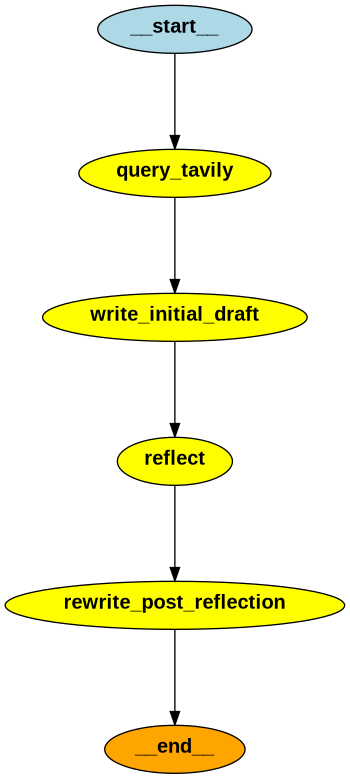

In [50]:
from IPython.display import Image

Image(graph.get_graph().draw_png())

In [51]:
result = graph.invoke({"query": "latest developments towards AGI"})

print(result)

{'query': 'latest developments towards AGI', 'tavily_responses': ['Sorry, your browser is not supported. We recommend upgrading your browser.\n\nFind the latest resources: white papers, reports, and videos to make the right decision for your project.\n\nAn ecosystem of industry leaders accelerating specialized infrastructure compute.\n\nDiscover why millions of developers call GitHub home & check out the arm CoPilot extension.\n\nThe Arm Developer Program brings together developers from across the globe and provides the perfect space to learn from leading experts, take advantage of the latest tools, and network.\n\nBite-sized learning videos across the full range of Arm IP.\n\nBe part of the world’s largest open computing ecosystem.\nArm Account\nNeed an Arm ID?\nRegister here\n\nAchieving the Next Era of Intelligence\nWhat Does the Future Hold for Artificial General Intelligence?\nExplore how industry leaders are defining artificial general intelligence (AGI) and what it may take to r

In [52]:
with open("initial_report.html", encoding = 'utf-8', mode = 'w') as f:
    f.write(result['initial_draft'])

with open("final_report.html", encoding = 'utf-8', mode = 'w') as f:
    f.write(result['final_draft'])